#Logistic Regression

Logistic regression do not model the response Y, instead it models the probability that Y belongs to a particular category.


Logistic regression measures the
$\hat{y_i} = g(w_0 + w_1 x_{i1} + w_2 x_{i2}+ ........+ w_d x_{id})$

#Loss Function: Mean Square Error(MSE)

$L_{MSE} = \frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{y_i})^{2}$

#Gradient Descent

1. Initializa w
2. $w_{t+1} = w_{t} - η\nabla_{w}L_{MSE}$

Implementing Gradient Descent on a simple function(a parabola)

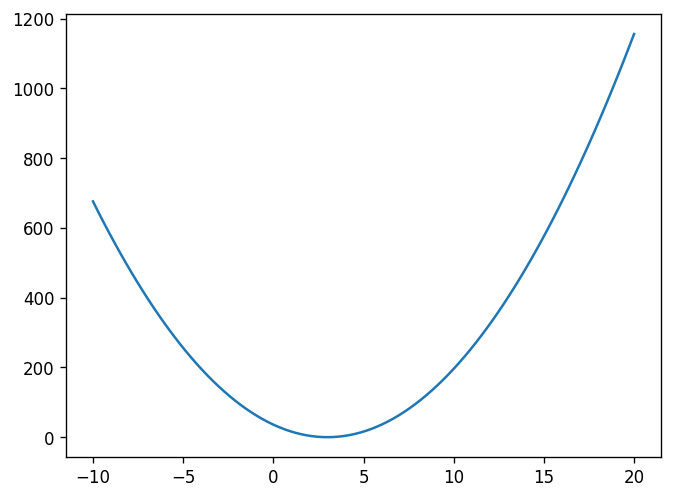

In [ ]:
import numpy as np

x = np.linspace(-10,20,100)
y = 4 * ((x-3)**2)


import matplotlib.pyplot as plt
plt.figure(dpi=120)
plt.plot(x, y)
plt.show()

In [ ]:
x = np.random.rand() * 20 - 10
print('Initial x:', x)
x0 = x

eta = 0.1
for i in range(1000):
  prev_x = x
  x = x - eta * 8 * (x-3)
  if np.abs(prev_x - x) < 1e-12:
    print('break at:', i)
    break
print('Final x: ', x)

Initial x: 2.7265225249720864
break at: 17
Final x:  2.9999999999999285


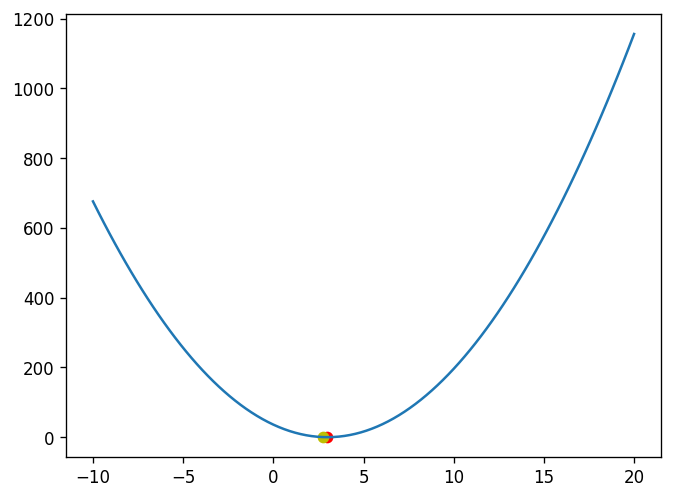

In [ ]:
import matplotlib.pyplot as plt
plt.figure(dpi=120)

xpts = np.linspace(-10,20,100)
plt.plot(xpts, 4 * ((xpts-3) ** 2))

plt.scatter(x, 4 * ((x-3) ** 2), c='r')

plt.scatter(x0, 4 * ((x0-3) ** 2), c='y')
plt.show()

Estimating Logistic Regression parameters using Gradient Descent over the MSE Loss Function

In [ ]:
X

array([[ 1.00000000e+00,  1.14718703e+00,  1.18815219e+00],
       [ 1.00000000e+00, -3.76016262e-01, -1.13123442e+00],
       [ 1.00000000e+00,  5.88156762e-01,  9.08038221e-01],
       [ 1.00000000e+00, -1.42846496e+00,  2.42750008e-01],
       [ 1.00000000e+00, -2.85450235e-01, -9.43312429e-02],
       [ 1.00000000e+00, -9.69356725e-01,  6.45067113e-01],
       [ 1.00000000e+00, -4.81383175e-01, -9.32961194e-02],
       [ 1.00000000e+00,  5.26044370e-01,  7.09624361e-01],
       [ 1.00000000e+00, -1.36962955e+00,  2.04343026e+00],
       [ 1.00000000e+00, -1.29195415e-01, -4.28098613e-02],
       [ 1.00000000e+00, -4.30433559e-01, -1.63206051e+00],
       [ 1.00000000e+00,  1.22038072e+00,  1.50957517e+00],
       [ 1.00000000e+00,  4.34939831e-01, -9.87233677e-01],
       [ 1.00000000e+00,  1.59036423e+00,  7.08373834e-01],
       [ 1.00000000e+00, -1.65192187e+00, -1.82974944e+00],
       [ 1.00000000e+00, -1.45758285e+00,  7.55691657e-01],
       [ 1.00000000e+00, -1.22085894e+00

(200, 3)


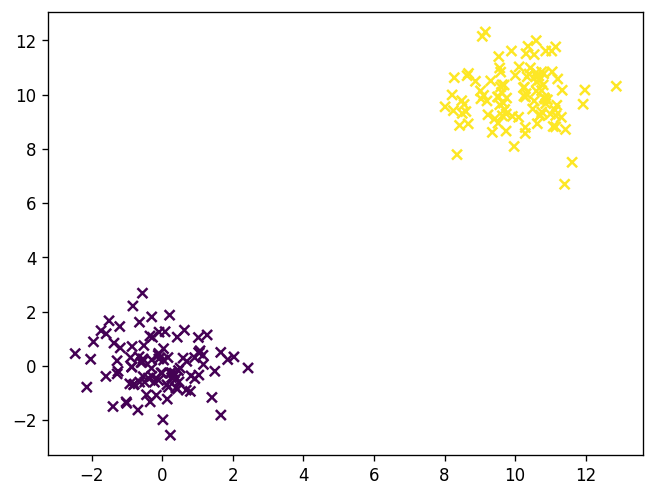

In [ ]:
X = np.vstack((
  np.random.normal(loc=[0,0], scale=1, size=(100,2)),
  np.random.normal(loc=[10,10], scale=1, size=(100,2))
))
n = X.shape[0]
X = np.hstack((
    np.ones((n,1)), X))
print(X.shape)

y = np.hstack(( np.zeros((100)), np.zeros((100))+1 ))

plt.figure(dpi=120)
plt.scatter(X[:,1], X[:,2], marker='x', c=y)
plt.show()

Logistic Regression

$\hat{y_i} = g(w_0 + w_1 x_{i1} + w_2 x_{i2}+ ........+ w_d x_{id}) = g(w^{T}x_i)$

$g(t) = \frac{1}{1+e^{-t}}$

$\frac{\partial g(f)}{\partial t} = \frac{(1-e^{-t})^2\times0-1\times(-e^{-t})}{({1+e^{-t}})^2} = \frac{e^{-t}}{({1+e^{-t}})^2}$

$=\frac{1}{1+e^{-t}}.\frac{e^{-t}}{1+e^{-t}} = \frac{1}{1+e^{-t}}.(1-\frac{1}{1+e^{-t}})$

$=g(t).(1-g(t))$

$\frac{g(X)}{1-g(X)} = e^{\beta_0 + \beta_1X}$

$\frac{g(X)}{1-g(X)}$ is called odds and can take values from 0 and $∞$

$\log (\frac{g(X)}{1-g(X)})$ is called the log-odds or logit.

So, the logistic regression model has logit function that is linear.

#MSE Loss:
$L_{MSE} = \frac{1}{n}∑_{i=1}^{n}{(y_i - \hat{y_i})^2}$

#Gradient of MSE:

$\nabla_{w_j}L_{MSE} = -\frac{2}{n}∑_{i=1}^{n}\{(y_i - \hat{y_i}).g(w^{T}x_i).(1 - g(w^{T}x_i))\}x_{ij}$
$= -\frac{2}{n}∑_{i=1}^{n}\{(y_i - \hat{y_i}).{\hat{y_i}}.(1 - \hat{y_i})\}x_{ij}$

In [ ]:


def g(t):
  return 1 / (1 + np.exp(-t))

w = s(3) * 2 - 1
#w[0] = -10
w0 = np.array(w)
print('Initial w:', w0)

eta = 0.1
for i in range(1000):
  prev_w = np.array(w) # prev_w = w will not create a separate copy
  est_y = g(X@w)
  w = w - eta * (-(2/n) * (((y - est_y) * est_y * (1 - est_y)) @ X) )
  if np.linalg.norm(prev_w - w) < 1e-9:
    print('break at:', i)
    break
print('Final w:', w)

Initial w: [ 0.34695474  0.22059493 -0.85190329]
Final w: [-2.42322813  0.38383624  0.26958944]
